In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A Recursive Warmup

While we haven't had too much use for it yet, it is worth while to see some relatively simple examples of more classic recursive programs in Python. What I mean by this is the following.  Say we wanted to compute the factorial of an integer $n$, i.e. we want to find $n!$.  Well, then we use the recursive formula

$$
n! = n(n-1)!
$$

along with the stopping criteria that $0!=1$.  In code, this looks like 

In [ ]:
def r_factorial(n):
    if n==0: # Here we implement the stopping criteria which ends the recursion.  
        return 1
    else: # Here, having not reached a stoppping point, we recurse
        return #add code here 

In [ ]:
print("An example for n=3, 3!=%d"%r_factorial(3))

## From Two Approximations, We Find a Third

So, as we show in the homework, letting

$$
T_{[a,b]}(f) = \int_{a}^{b}f(x)dx
$$

and

$$
A_{[a,b]}(f) = \frac{(b-a)}{6}\left(f(a) + 4f(c) + f(b)\right), ~ c = \frac{a+b}{2},
$$

Simpson's method gives us

$$
T_{[a,b]}(f) = A_{[a,b]}(f) + C_{0}(b-a)^{5} + C_{1}(b-a)^{6} + \cdots.
$$

In this vein, if we split $T_{[a,b]}(f)$ into 

$$
T_{[a,b]}(f) = T_{[a,c]}(f) + T_{[c,b]}(f), ~ c = \frac{a+b}{2},
$$

then by cutting each subinterval in half, we we can build a better approximation by using

$$
T_{[a,b]}(f) = A_{[a,c]}(f) + A_{[c,b]}(f) + \frac{C_{0}}{16}(b-a)^{5} + \frac{C_{1}}{32}(b-a)^{6} + \cdots
$$

where

$$
A_{[a,c]}(f) = \frac{c-a}{6}\left(f(a) + 4f(d) + f(c) \right), ~ d = \frac{a+c}{2}
$$

and

$$
A_{[c,b]}(f) = \frac{b-c}{6}\left(f(c) + 4f(e) + f(b) \right), ~ e = \frac{c+b}{2}
$$

**Problem 1**: Using the approximations 

$$
T_{[a,b]}(f) = A_{[a,b]}(f) + C_{0}(b-a)^{5} + C_{1}(b-a)^{6} + \cdots.
$$

and

$$
T_{[a,b]}(f) = A_{[a,c]}(f) + A_{[c,b]}(f) + \frac{C_{0}}{16}(b-a)^{5} + \frac{C_{1}}{32}(b-a)^{6} + \cdots
$$

show that you can find the improved approximation

$$
T_{[a,b]}(f) = \frac{16}{15}\left(A_{[a,c]}(f) + A_{[c,b]}(f)\right) - \frac{1}{15}A_{[a,b]}(f) - \frac{C_{1}}{30}(b-a)^{6} + \cdots
$$

## Adaptive Quadrature

What if for a given tolerance, say tol, I can show that

$$
\left|\left(A_{[a,c]}(f) + A_{[c,b]}(f)\right) - A_{[a,b]}(f)\right| < \mbox{tol} ~ \mbox{?}
$$

As in, okay, I make two approximations, one okay ($A_{[a,b]}(f)$), one better $\left(A_{[a,c]}(f) + A_{[c,b]}(f)\right)$.  But the difference between them is not so large?  Then what is the point of continuing to make smaller subdivisions of the interval when I am actually happy with what I have got?  So, how would I implement a method based on this line of thinking?  And what would it get me?  

If we follow our noses, we are then led to the following algorithm:

Given $a$, $b$ ($b>a$), $f(x)$, and tol
<ol>
    <li> Compute $Aab = \frac{b-a}{6}(f(a) + 4f(c) + f(b))$, where $c=(a+b)/2$.        
    <li> Compute $Aac = \frac{c-a}{6}(f(a) + 4f(d) + f(c))$, where $d=(a+c)/2$.    
    <li> Compute $Acb = \frac{b-c}{6}(f(c) + 4f(e) + f(b))$, where $e=(c+b)/2$.    
    <li> Check: Is $\left|Aac+Acb - Aab \right|<\mbox{tol}$?        
        <ol>
            <li>: Yes, then return $\frac{16}{15}(Aac+Acb)-\frac{1}{15}Aab$ (this is the stopping condition)            
            <li>: No, then divide each half interval further and recursively repeat.    
        </ol>        
</ol>

In [24]:
def adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol,ptlst):
    
    d = (a+c)/2. 
    e = (c+b)/2.
    ptlst.append(d)
    ptlst.append(e)
    fd = f(d)
    fe = f(e)
    dx = c-a
    Aac = dx/6*(fa+4.*fd+fc)
    Acb = dx/6*(fc+4.*fe+fb) 
    if np.abs(Aac+Acb-Aab)<=tol: # This is our stopping condition in terms of tol
        return (16./15.*(Aac+Acb)-Aab/15.)
    else: # This is if we do not meet the tol condition 
        F1 = adap_quad_comp(f,a,c,d,fa,fc,fd,Aac,tol,ptlst)
        F2 = adap_quad_comp(f,c,b,e,fc,fb,fe,Acb,tol,ptlst)
        return F1 + F2

In [29]:
def adap_quad(f,a,b,tol):
    c = (a+b)/2.
    fa = f(a)
    fb = f(b)
    fc = f(c)
    dx = b-a
    Aab = dx/6.*(fa+4.*fc+fb)
    ptlst = [a, c, b]
    ival = adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol,ptlst)
    
    # Plotting commands.  Remove the tick marks above and below to turn them on.  
    ptlst.sort()
    for jj in range(0,len(ptlst)):
        fval = f(ptlst[jj])
        if fval > 0:
            plt.plot([ptlst[jj],ptlst[jj]],[0,fval],color='r',ls='--')
        else:
            plt.plot([ptlst[jj],ptlst[jj]],[fval,0],color='r',ls='--')
    xvals = np.linspace(a,b,int(1e3))
    yvals = f(xvals)
    zvals = np.zeros(xvals.size)
    plt.plot(xvals,yvals,color='k',ls='-')
    plt.plot(xvals,zvals,color='k',ls='-')
    
    return ival

So okay, fine, you have an adaptive method.  But what does that really mean?  A way to find out is to look at the function

$$
f(x) = \sin\left(x^{2}\right)
$$

which is going to oscillate more and more rapidly as $x$ increases.  If we use the plotting commands above, we should be able to see how our algorithm uses different spacings of mesh points in order to maintain an overall level of accuracy in computing integrals of such a funky function (ha, I'm so funny).  

0.4969253743325054


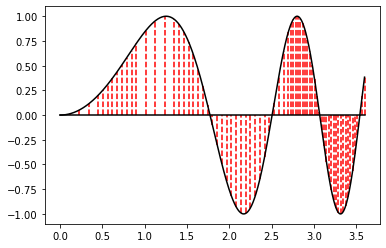

In [30]:
faq = lambda x : np.sin(x**2.)
print(adap_quad(faq,0.,3.6,1e-4))

So finally, we really do need to experiment in order to figure out how the error behaves as we change the tolerance for our adaptive quadrature scheme.  To wit, let's pick our favorite $f(x)=\cos^{2}(x)$ so that 
$$
T_{[a,b]}(f) = \int_{a}^{b}\cos^{2}(x)dx = \frac{1}{2}\int_{a}^{b}\left(1 + \cos(2x) \right)dx = \frac{1}{2}\left(b-a + \frac{1}{2}\left(\sin(2b)-\sin(2a)\right)\right)
$$

We can then look at error performance as we change the tolerance for intervals of different widths.  Give it a shot and describe your results.  

In [27]:
def adap_error_test(a,b):
    f = lambda x: (np.cos(x))**2.
    tval = (b-a)/2. + (np.sin(2.*b)-np.sin(2.*a))/4.
    tolvals = np.array([1e-1,1e-2,1e-3,1e-4,1e-5])
    Evals = np.zeros(tolvals.size)
    for jj in range(0,tolvals.size):
        Evals[jj] = np.log10(np.abs(tval - adap_quad(f,a,b,tolvals[jj])))
    xvals = -np.log10(tolvals)
    plt.plot(xvals,Evals)
    plt.xlabel('$-log_{10}(tol)$')
    plt.ylabel('$log_{10}(Error)$')
    
    novals = Evals.size
    slopes = (Evals[1:novals]-Evals[0:novals-1])/(xvals[1:novals]-xvals[0:novals-1])
    print(np.min(slopes))
    print(np.max(slopes))
    print(np.mean(slopes))

-1.8334358181865325
0.0
-0.5877213164129689


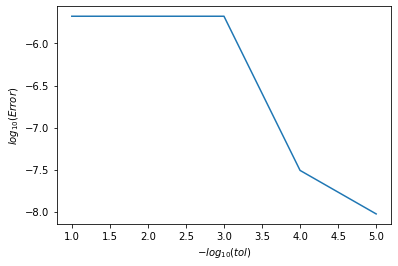

In [28]:
adap_error_test(0.,np.pi/4.)